## EDA

In [1]:
import pandas as pd
fish = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
pd.unique(fish["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
fish["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<Axes: >

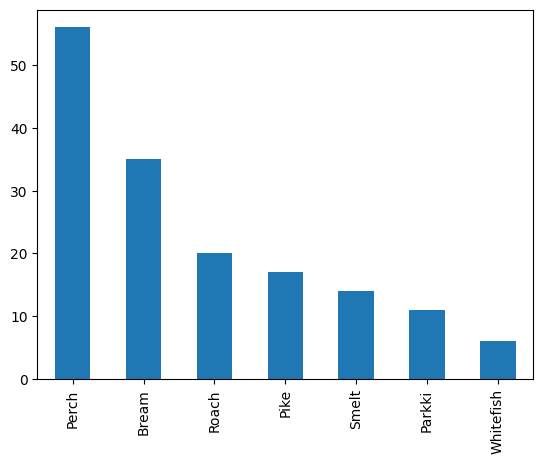

In [4]:
import matplotlib.pyplot as plt

fish["Species"].value_counts().plot.bar()

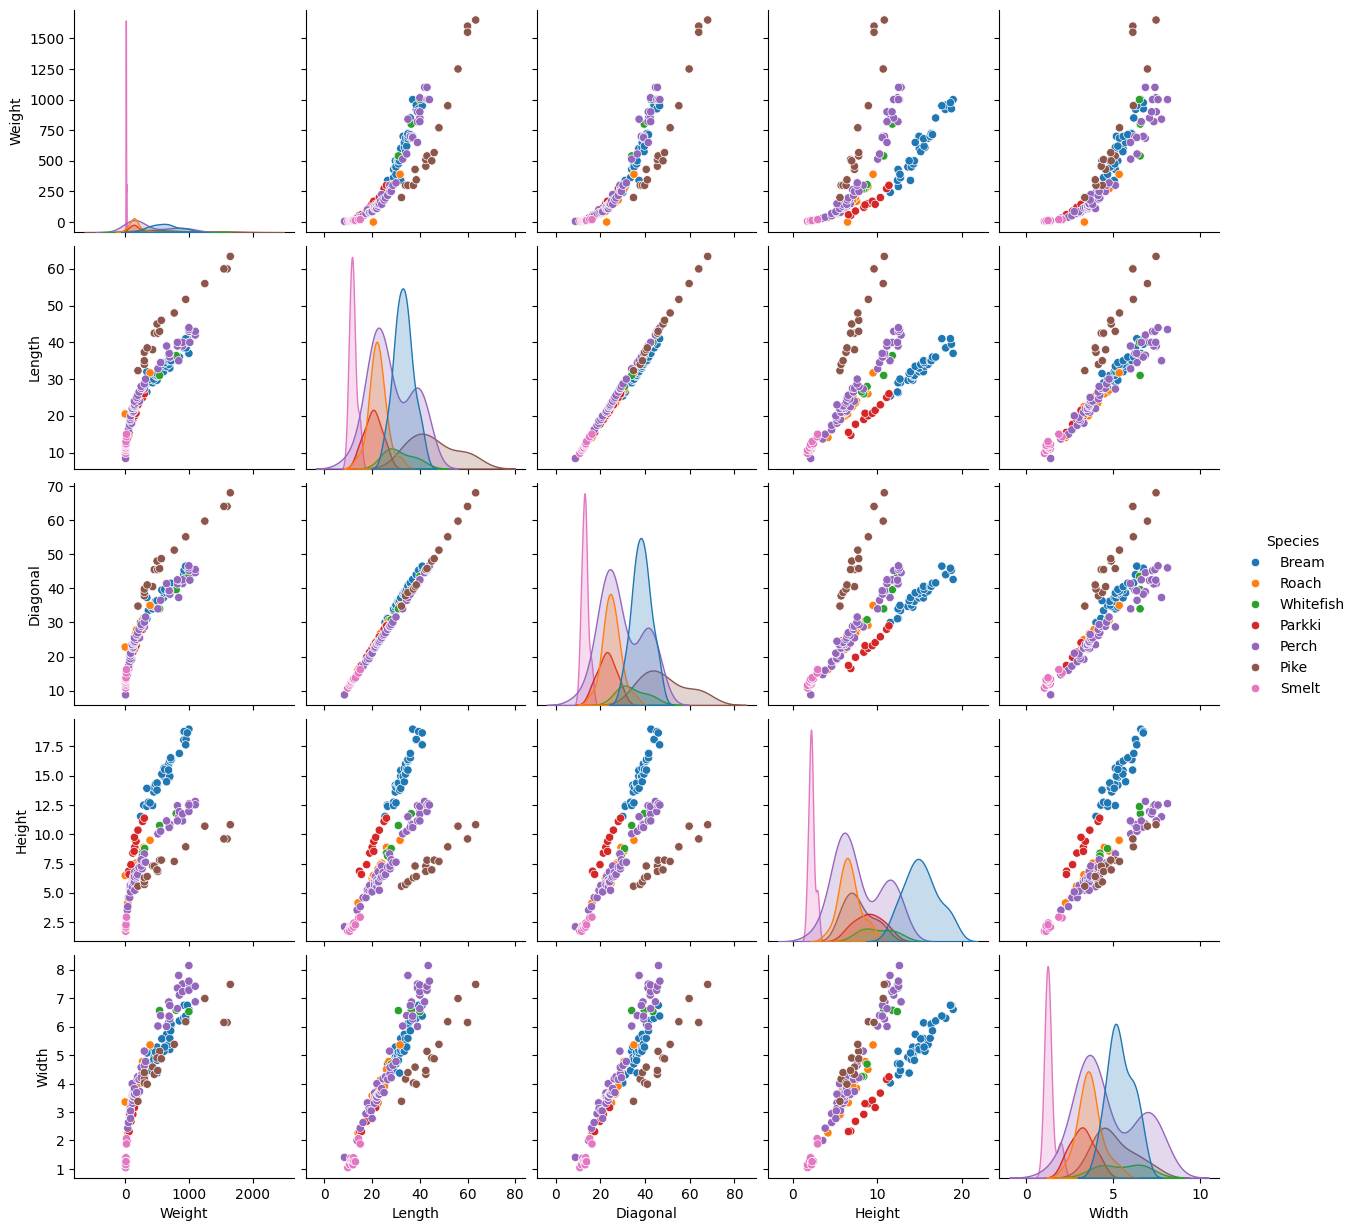

In [5]:
import seaborn as sns
sns.pairplot(fish, hue="Species")

In [6]:
corr = fish.corr()
corr

<ipython-input-6-ba5746c31b18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fish.corr()


,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.918618,0.923044,0.724345,0.886507
Length,0.918618,1.000000,0.994103,0.640441,0.873547
Diagonal,0.923044,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.873547,0.878520,0.792881,1.000000


<Axes: >

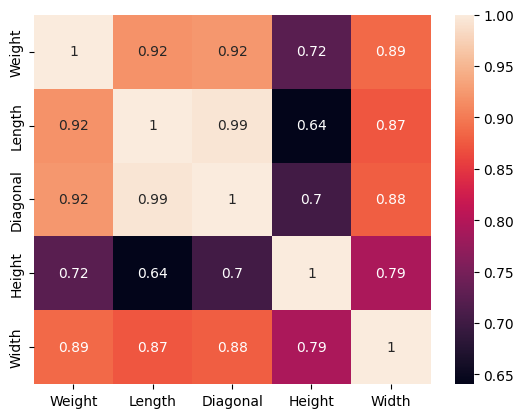

In [7]:
sns.heatmap(corr, annot=True)

## 데이터 전처리

### 1. 독립 변수 / 종속 변수 - 7종 생선, 5가지 속성

In [8]:
X = fish.drop("Species", axis = 1)
y = fish["Species"]

display(X, y)

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

### 2. 훈련/테스트 데이터 나누기

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(111, 5) (48, 5) (111,) (48,)


### 3. 사이킷런을 사용한 표준화

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

## 머신러닝

### 1. KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

print(f"knn score(train) = {round(knn.score(X_train_scaled, y_train), 2)}%")
print(f"knn score(test) = {round(knn.score(X_test_scaled, y_test), 2)}%")

knn score(train) = 0.86%
knn score(test) = 0.69%


### 2. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print(f"lr score(train) = {round(lr.score(X_train_scaled, y_train), 2)}%")
print(f"lr score(test) = {round(lr.score(X_test_scaled, y_test), 2)}%")

lr score(train) = 0.8%
lr score(test) = 0.67%


In [13]:
print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)

print("--------------------------------------------------------------")
print(lr.coef_, lr.intercept_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)
--------------------------------------------------------------
[[-0.13453    -0.07409028  0.60539819  2.81776263 -0.24864161]
 [-0.28042806 -0.60957591 -0.5497859   1.38969098 -0.67965408]
 [ 0.76174051  0.28999006 -1.2446337  -1.4800187   1.99814854]
 [ 0.02795084  1.66330258  1.67651655 -1.17920602 -0.4811935 ]
 [-0.73331758 -0.5321902   0.25976474 -0.25446989  0.39752993]
 [-0.35772208 -0.90733538 -0.93667464 -1.37004935 -1.56193103]
 [ 0.71630636  0.16989914  0.18941476  0.07629034  0.57574176]] [ 0.69752991 -0.42316023  2.3624254   0.08397585  1.01578164 -4.16122184
  0.42466928]


In [14]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(X_train_scaled, y_train)

print(f"lr score(train) = {round(lr.score(X_train_scaled, y_train), 2)}%")
print(f"lr score(test) = {round(lr.score(X_test_scaled, y_test), 2)}%")

lr score(train) = 0.95%
lr score(test) = 0.85%


In [15]:
lr.predict(X_test_scaled[:7])

array(['Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Parkki'],
      dtype=object)

In [19]:
# 테스트 세트의 처음 7개 샘플 예측 확률 출력
import numpy as np

np.set_printoptions(precision=6, suppress=True) # 지수 표현으로 나타난다면 실행
print(lr.predict_proba(X_test_scaled[:7]))
print(lr.classes_)

[[0.014264 0.008031 0.418411 0.015841 0.392996 0.000002 0.150456]
 [0.000142 0.003878 0.769826 0.002442 0.209065 0.000268 0.014379]
 [0.000053 0.010109 0.7274   0.001467 0.246533 0.005092 0.009347]
 [0.004764 0.       0.893346 0.004268 0.000034 0.       0.097589]
 [0.007093 0.       0.891201 0.001961 0.000197 0.       0.099548]
 [0.010236 0.000004 0.843844 0.007522 0.001613 0.       0.136781]
 [0.00283  0.766157 0.008826 0.000134 0.20632  0.001643 0.014091]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


### 3. Decistion Tree

In [22]:
# 학습 모델 생성 및 학습, 학습 데이터 정확도 + 테스트 데이터 정확도 출력, 트리 시각화
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"dt score(train) = {round(dt.score(X_train, y_train), 2)}%")
print(f"dt score(test) = {round(dt.score(X_test, y_test), 2)}%")

dt score(train) = 1.0%
dt score(test) = 0.69%


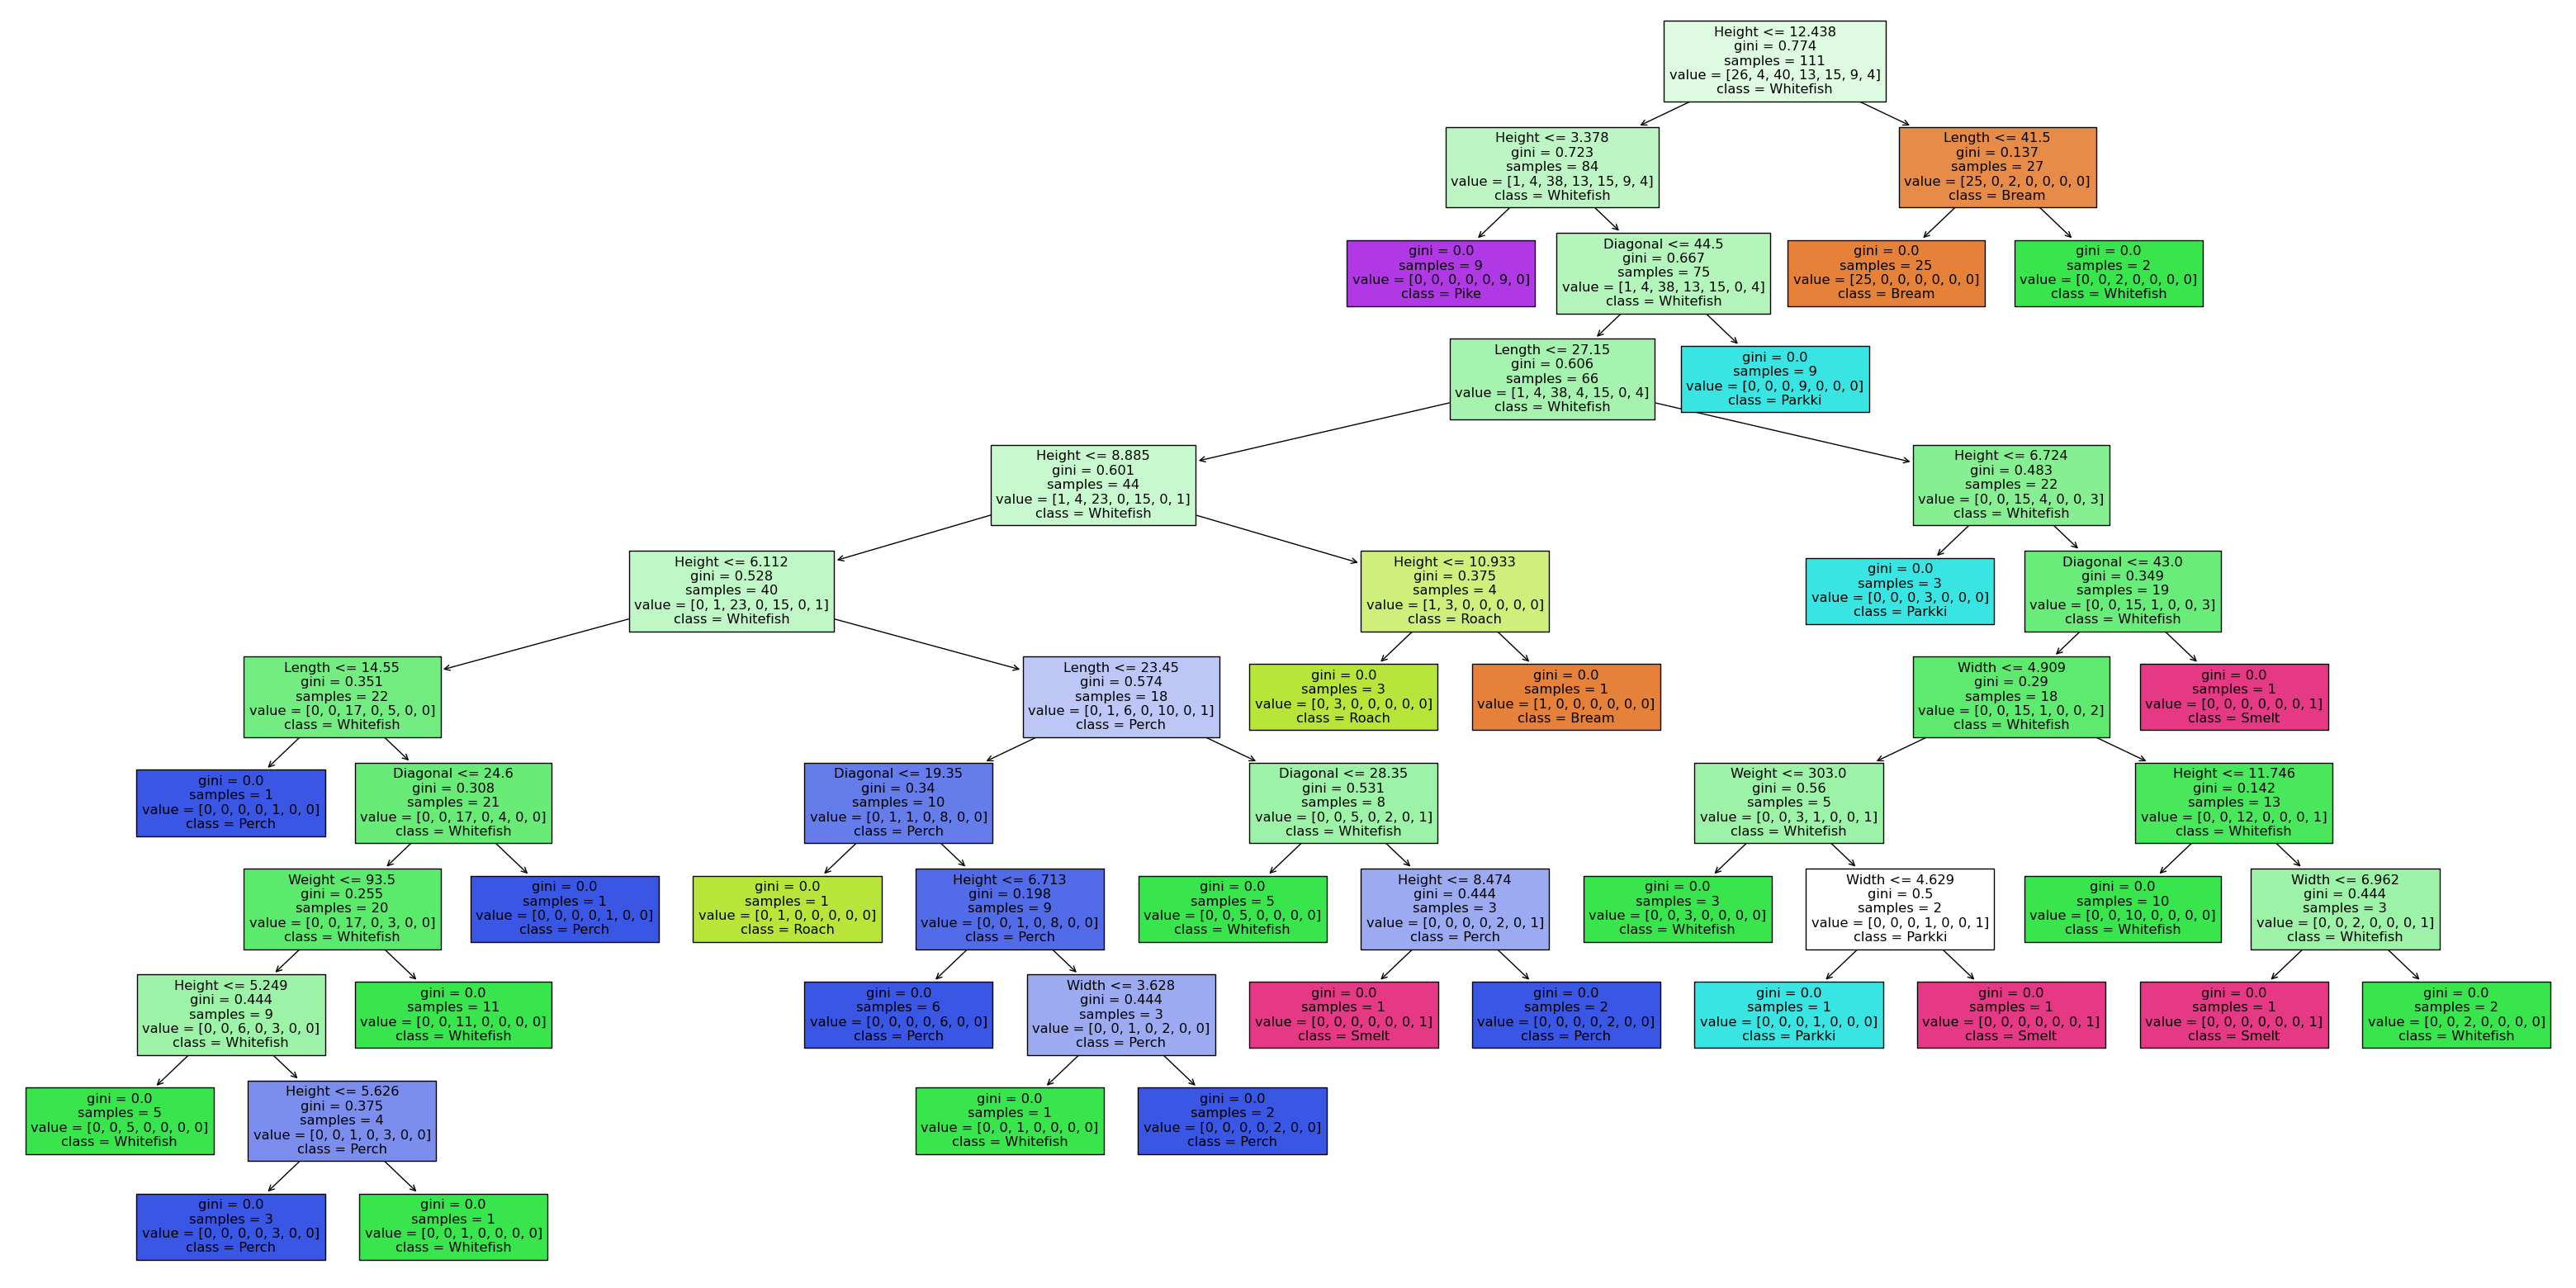

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [24]:
# 특성 중요도 확인

print(X.columns)
print(dt.feature_importances_)

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')
[0.033749 0.122392 0.202589 0.591894 0.049376]


In [25]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

print(f"dt1 score(train) = {round(dt1.score(X_train, y_train), 2)}%")
print(f"dt1 score(test) = {round(dt1.score(X_test, y_test), 2)}%")

dt1 score(train) = 0.75%
dt1 score(test) = 0.6%


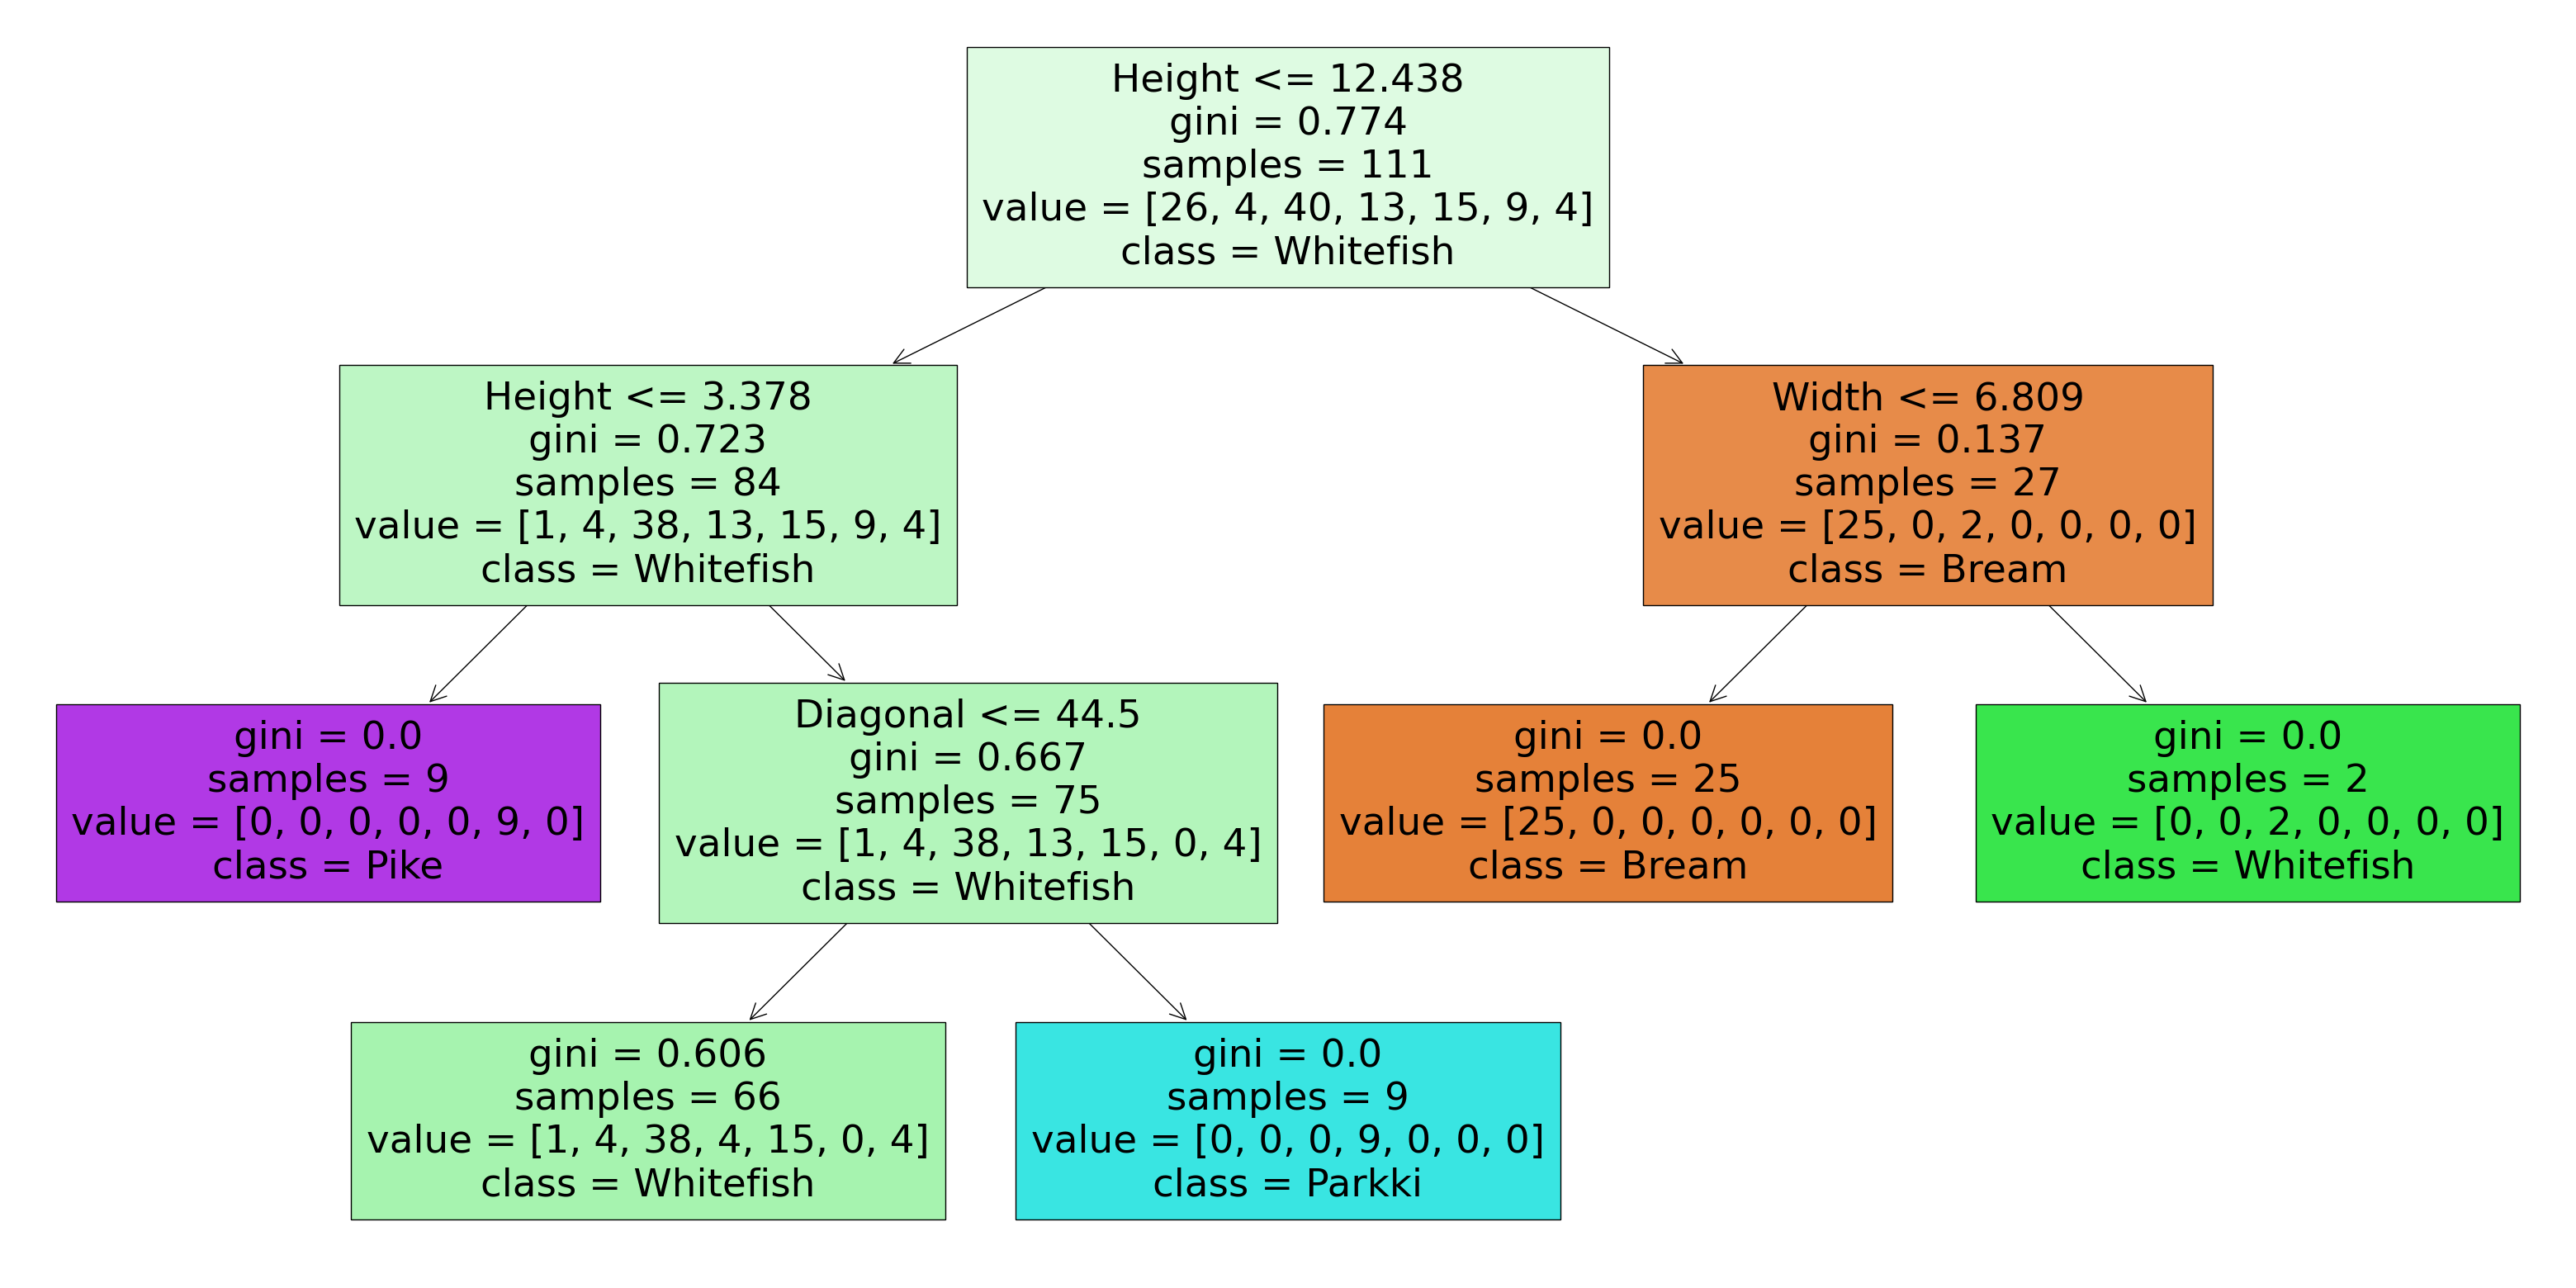

In [26]:
plt.figure(figsize=(40, 20))
plot_tree(dt1, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [43]:
dt2 = DecisionTreeClassifier(min_samples_split=20)
dt2.fit(X_train, y_train)

print(f"dt2 score(train) = {round(dt2.score(X_train, y_train), 2)}%")
print(f"dt2 score(test) = {round(dt2.score(X_test, y_test), 2)}%")

dt2 score(train) = 0.86%
dt2 score(test) = 0.71%


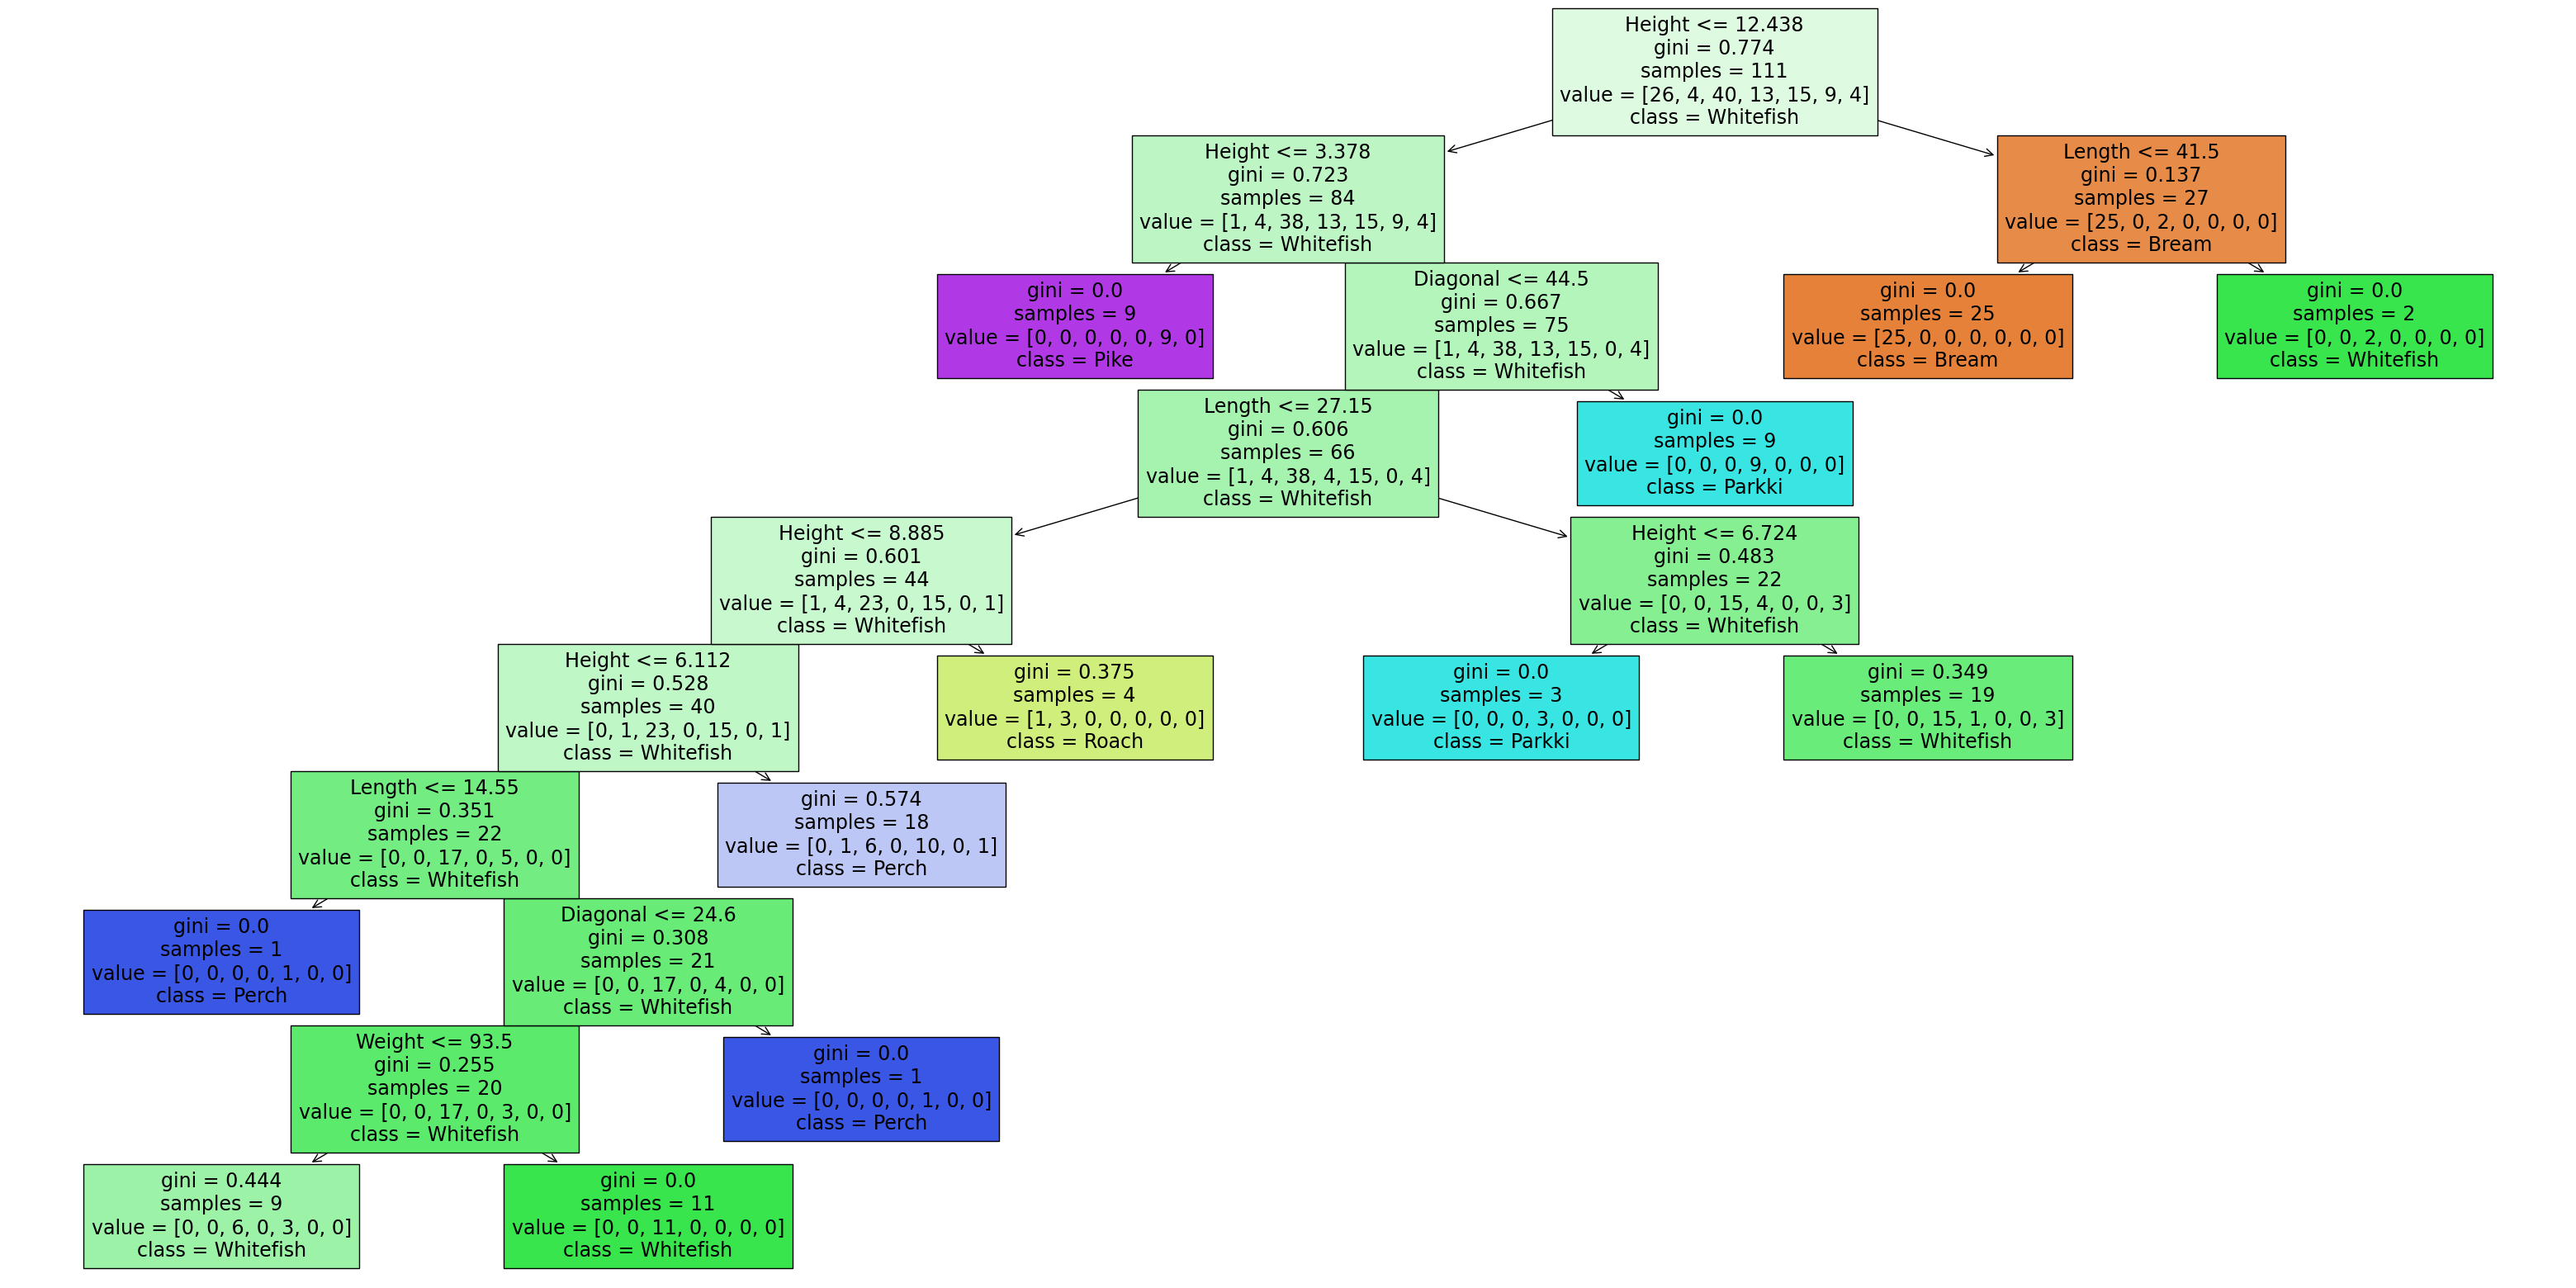

In [44]:
plt.figure(figsize=(40, 20))
plot_tree(dt2, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [50]:
dt3 = DecisionTreeClassifier(min_samples_leaf=5)
dt3.fit(X_train, y_train)

print(f"dt3 score(train) = {round(dt3.score(X_train, y_train), 2)}%")
print(f"dt3 score(test) = {round(dt3.score(X_test, y_test), 2)}%")

dt3 score(train) = 0.83%
dt3 score(test) = 0.67%


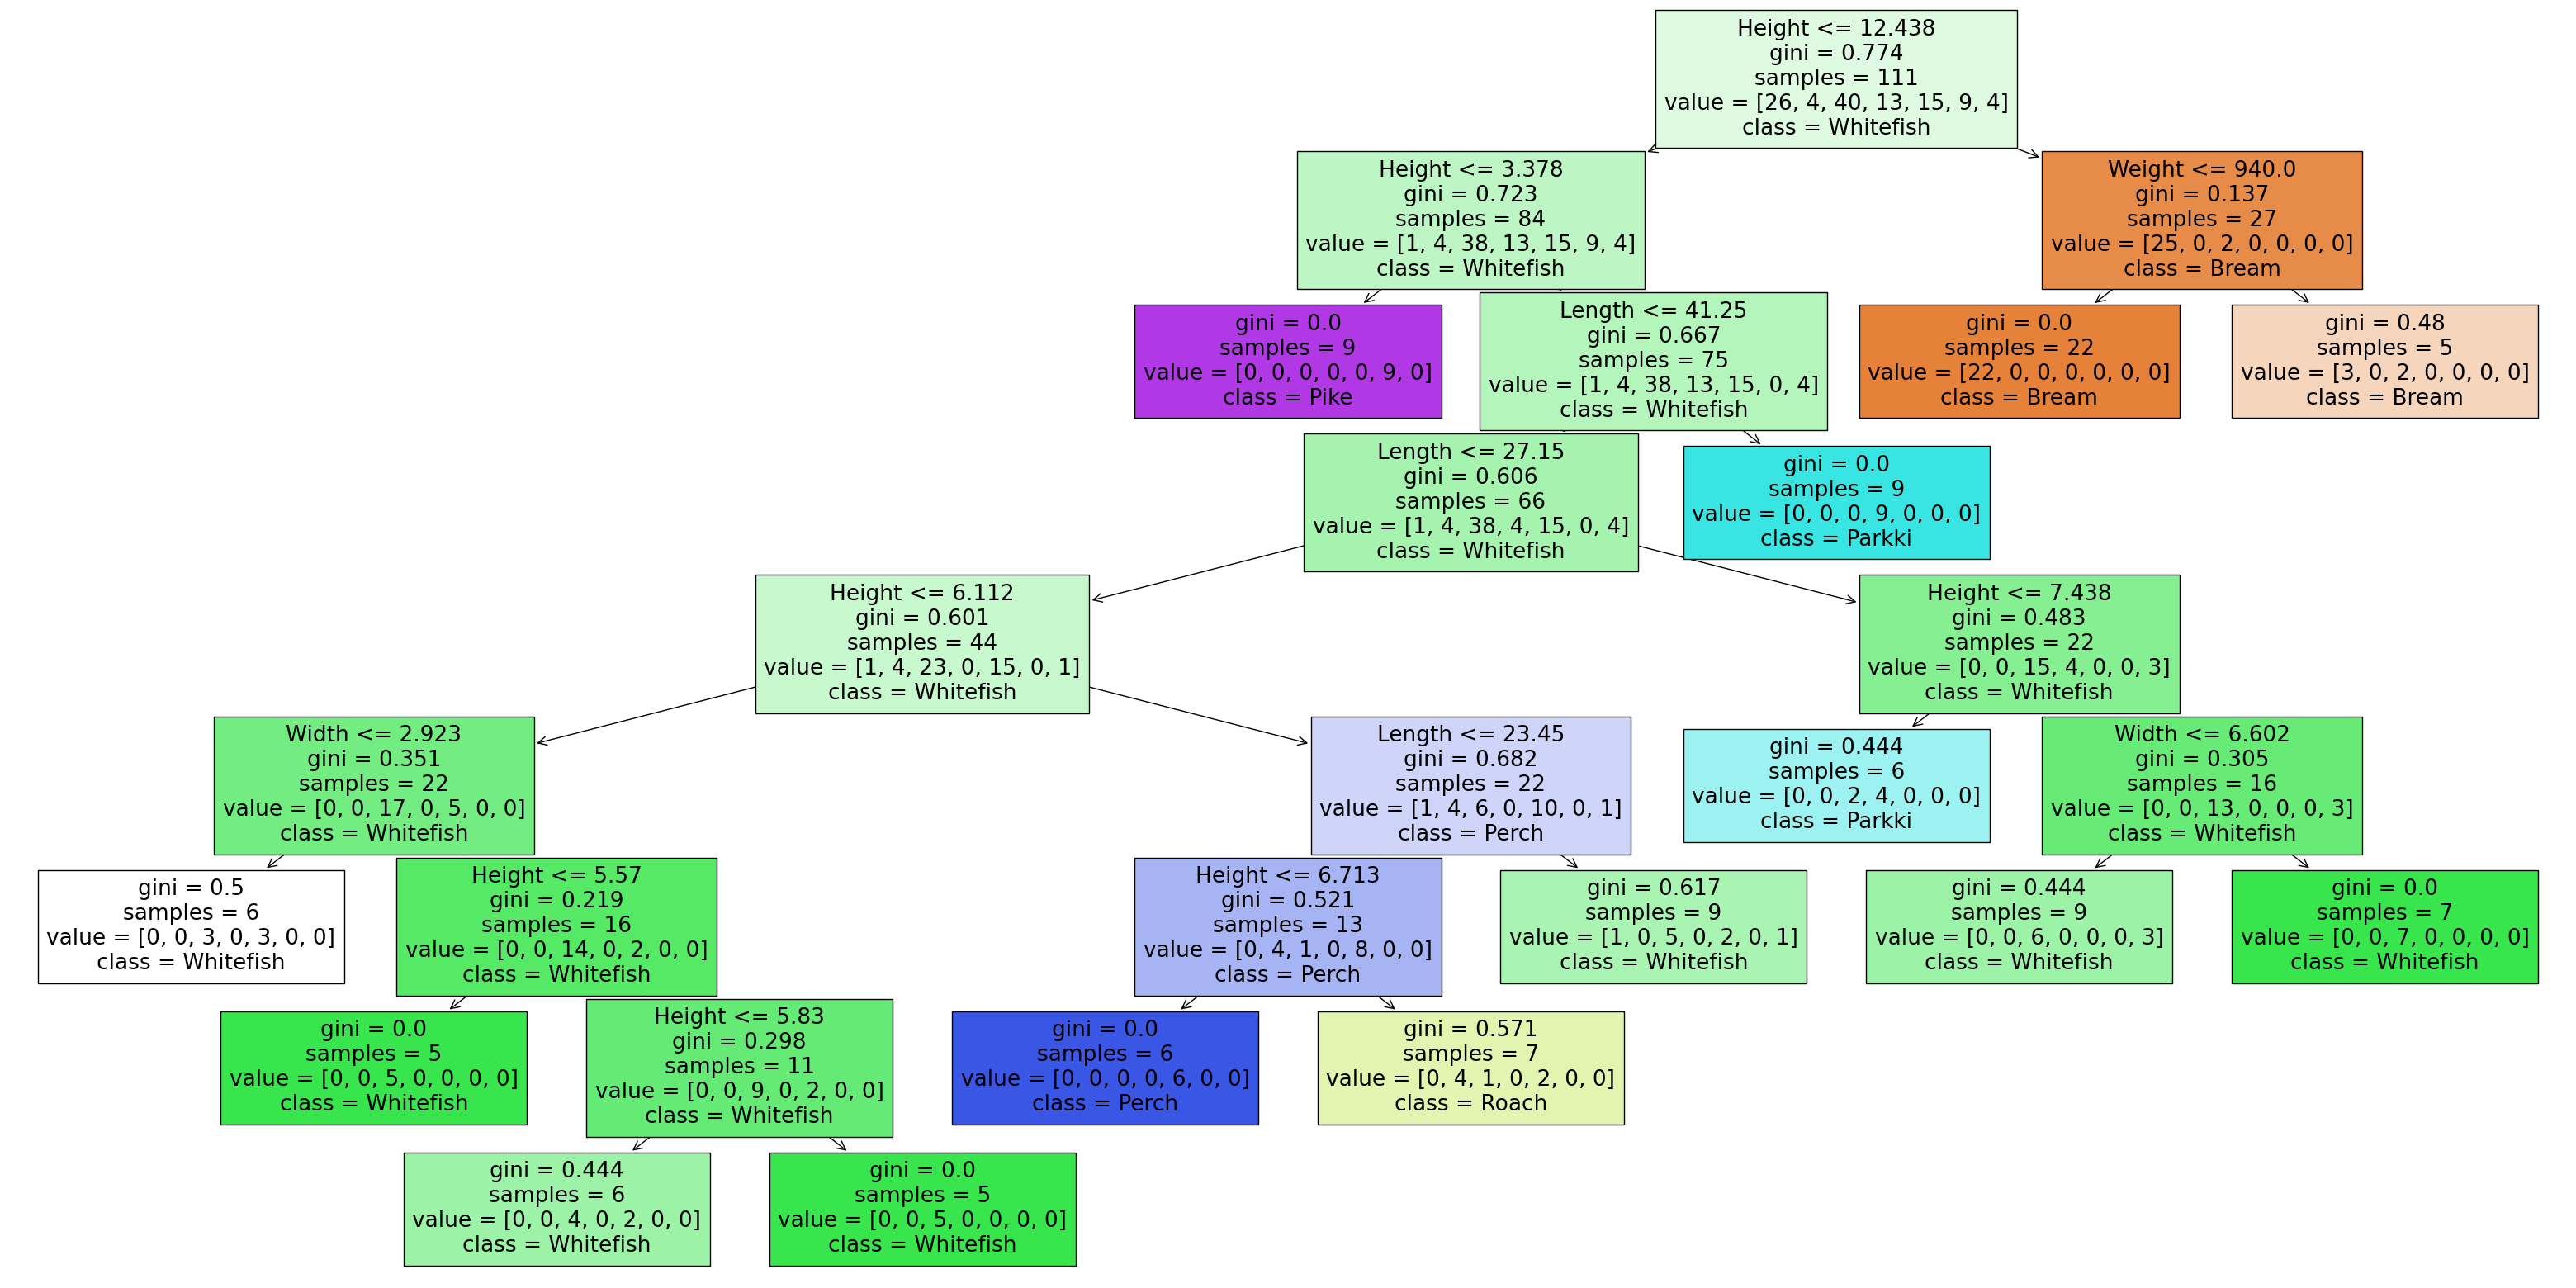

In [51]:
plt.figure(figsize=(40, 20))
plot_tree(dt3, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()